In [494]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
plt.style.use('classic')

# Data preprocessing and feature engineering
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Model evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Feature selection
from sklearn.feature_selection import SelectKBest, chi2, RFE

# Imbalanced data handling
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Other useful libraries
import warnings
warnings.filterwarnings('ignore')  # To suppress warnings
import pickle  # To save the model
import os


In [8]:
election = pd.read_csv("./Dataset/Election_Data.csv")

### Exploratory Data Analysis

In [10]:
election.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


$Tony Blair$ : He was the leader of the Labour Party and the Prime Minister of the United Kingdom from 1997 to 2007.

$William Hague$ : He was the leader of the Conservative Party from 1997 to 2001.

Therefore, the "Blair" and "Hague" columns likely represent survey respondents' opinions or favorability ratings of these two political figures at the time of the survey. The values in these columns (ranging from 1 to 5, as we saw in the describe() output) probably indicate a Likert scale, where:

1 = Very unfavorable opinion

5 = Very favorable opinion

In [33]:
election.shape

(1525, 9)

In [14]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [126]:
election.vote.unique()

array([1, 0], dtype=int64)

In [29]:
print(election.describe())

               age  economic.cond.national  economic.cond.household  \
count  1525.000000             1525.000000              1525.000000   
mean     54.182295                3.245902                 3.140328   
std      15.711209                0.880969                 0.929951   
min      24.000000                1.000000                 1.000000   
25%      41.000000                3.000000                 3.000000   
50%      53.000000                3.000000                 3.000000   
75%      67.000000                4.000000                 4.000000   
max      93.000000                5.000000                 5.000000   

             Blair        Hague       Europe  political.knowledge  
count  1525.000000  1525.000000  1525.000000          1525.000000  
mean      3.334426     2.746885     6.728525             1.542295  
std       1.174824     1.230703     3.297538             1.083315  
min       1.000000     1.000000     1.000000             0.000000  
25%       2.000000  

In [61]:
round(election.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.18,15.71,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.25,0.88,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.14,0.93,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.33,1.17,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.75,1.23,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.73,3.30,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.54,1.08,0.0,0.0,2.0,2.0,3.0


In [23]:
election = election.drop('Unnamed: 0', axis=1)

In [25]:
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [35]:
print(election['vote'].value_counts())
print(election['gender'].value_counts())

vote
Labour          1063
Conservative     462
Name: count, dtype: int64
gender
female    812
male      713
Name: count, dtype: int64


In [37]:
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

###### No null values, so no need of null value treatment

#### Univariate Analysis

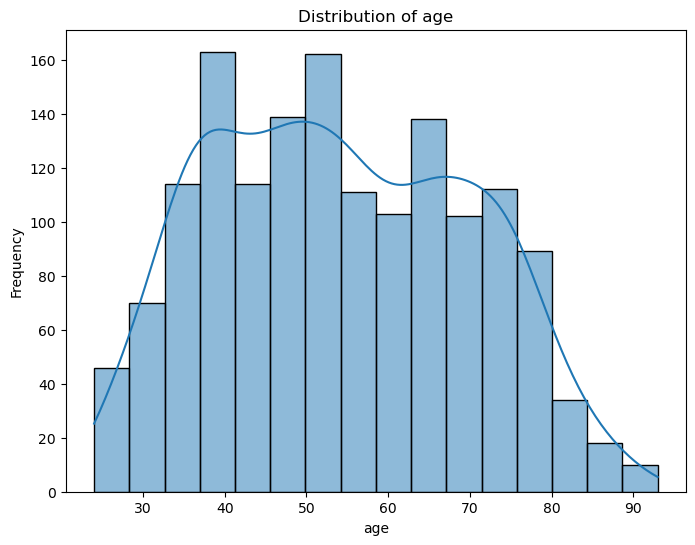

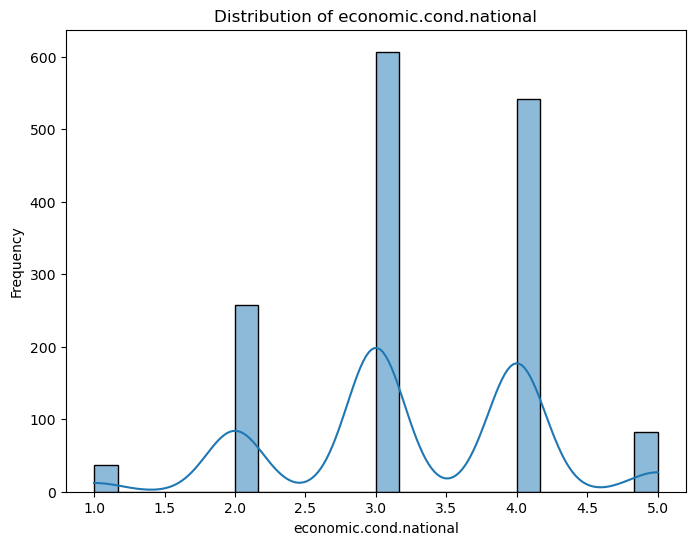

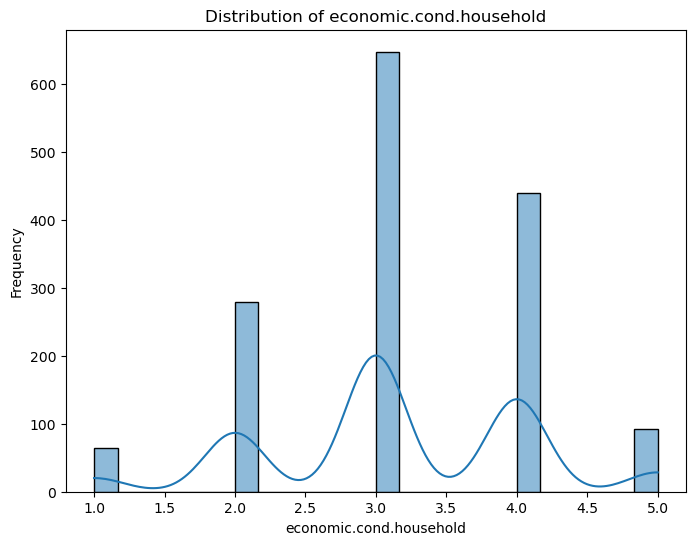

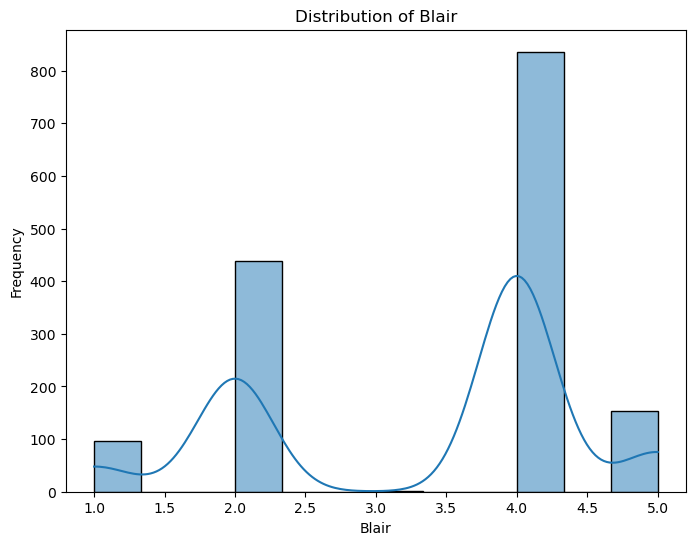

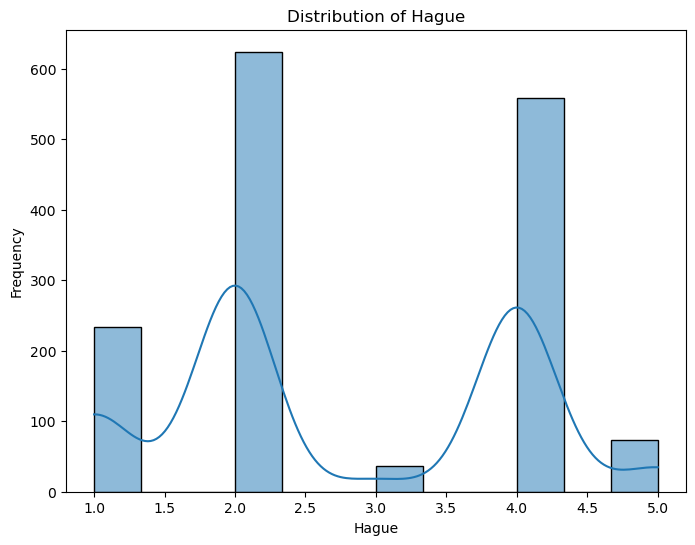

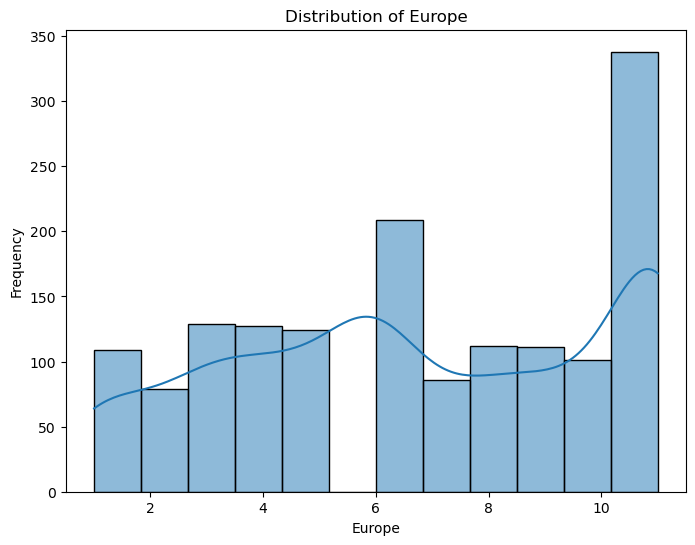

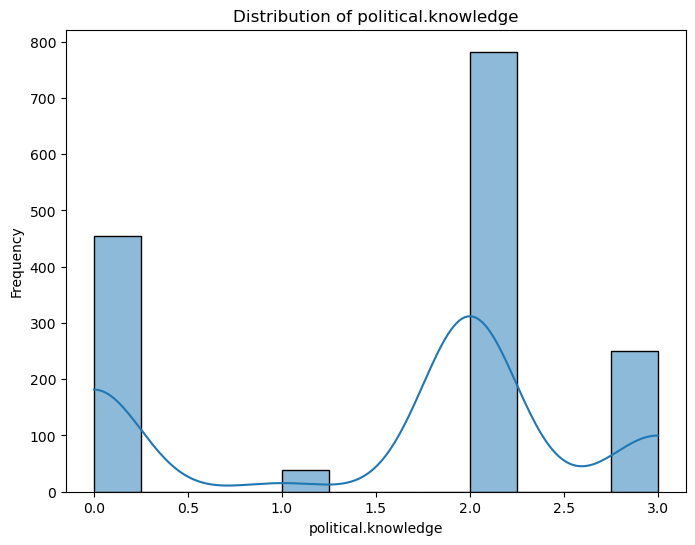

In [42]:
numerical_features = ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(election[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [46]:
### Separating Numerical and Categorical Columns

num = []
cat = []

for col in election.columns:
    if pd.api.types.is_numeric_dtype(election[col]):
        num.append(col)
    else:
        cat.append(col)

print("Numerical Columns:", num)
print("Categorical Columns:", cat)

Numerical Columns: ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']
Categorical Columns: ['vote', 'gender']


In [48]:
num

['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

In [50]:
cat

['vote', 'gender']

#### Bivariate Analysis

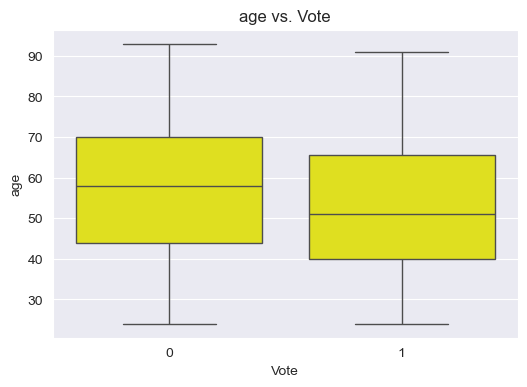

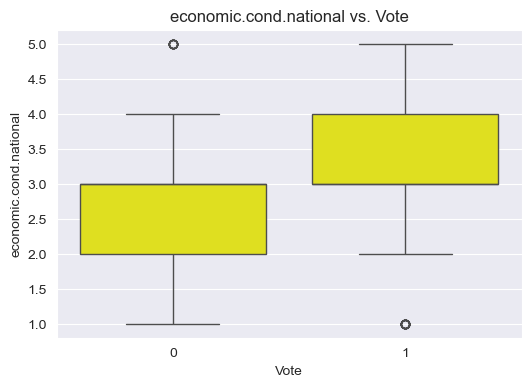

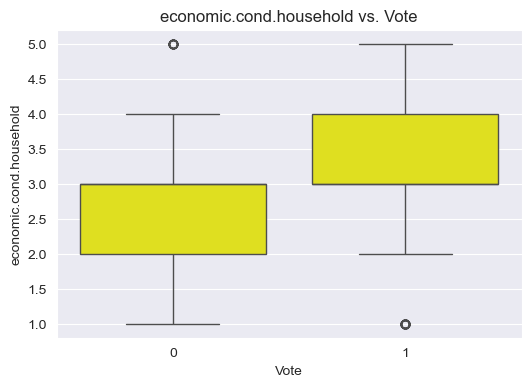

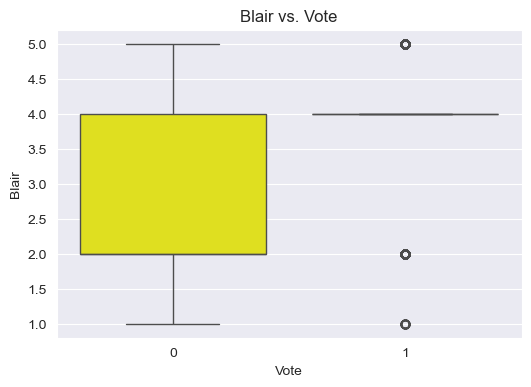

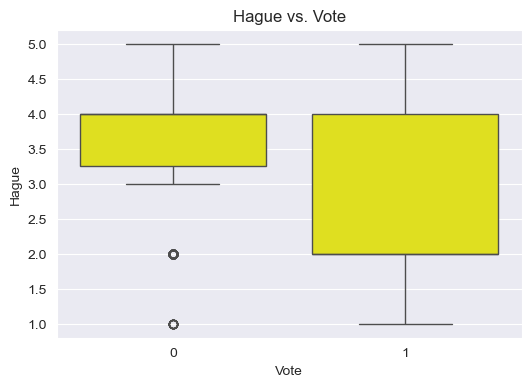

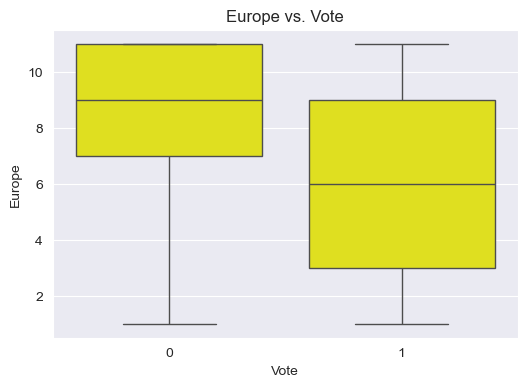

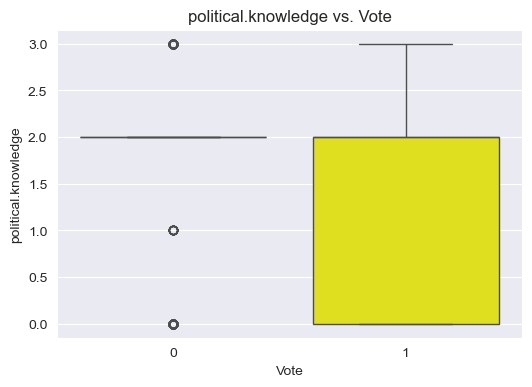

In [122]:
numerical_features = num
numerical_features = ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']

for feature in numerical_features:
    plt.figure(figsize=(6, 4))  # Reduced figure size
    sns.boxplot(x='vote', y=feature, data=election, color='yellow')
    plt.title(f'{feature} vs. Vote')
    plt.xlabel('Vote')
    plt.ylabel(feature)
    plt.show()

In [75]:
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [77]:
election['gender'] = election['gender'].replace(to_replace=['male', 'female'], value=[1, 0])
election['vote'] = election['vote'].replace(to_replace=['Labour', 'Conservative'], value=[1, 0])

In [79]:
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [81]:
num

['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

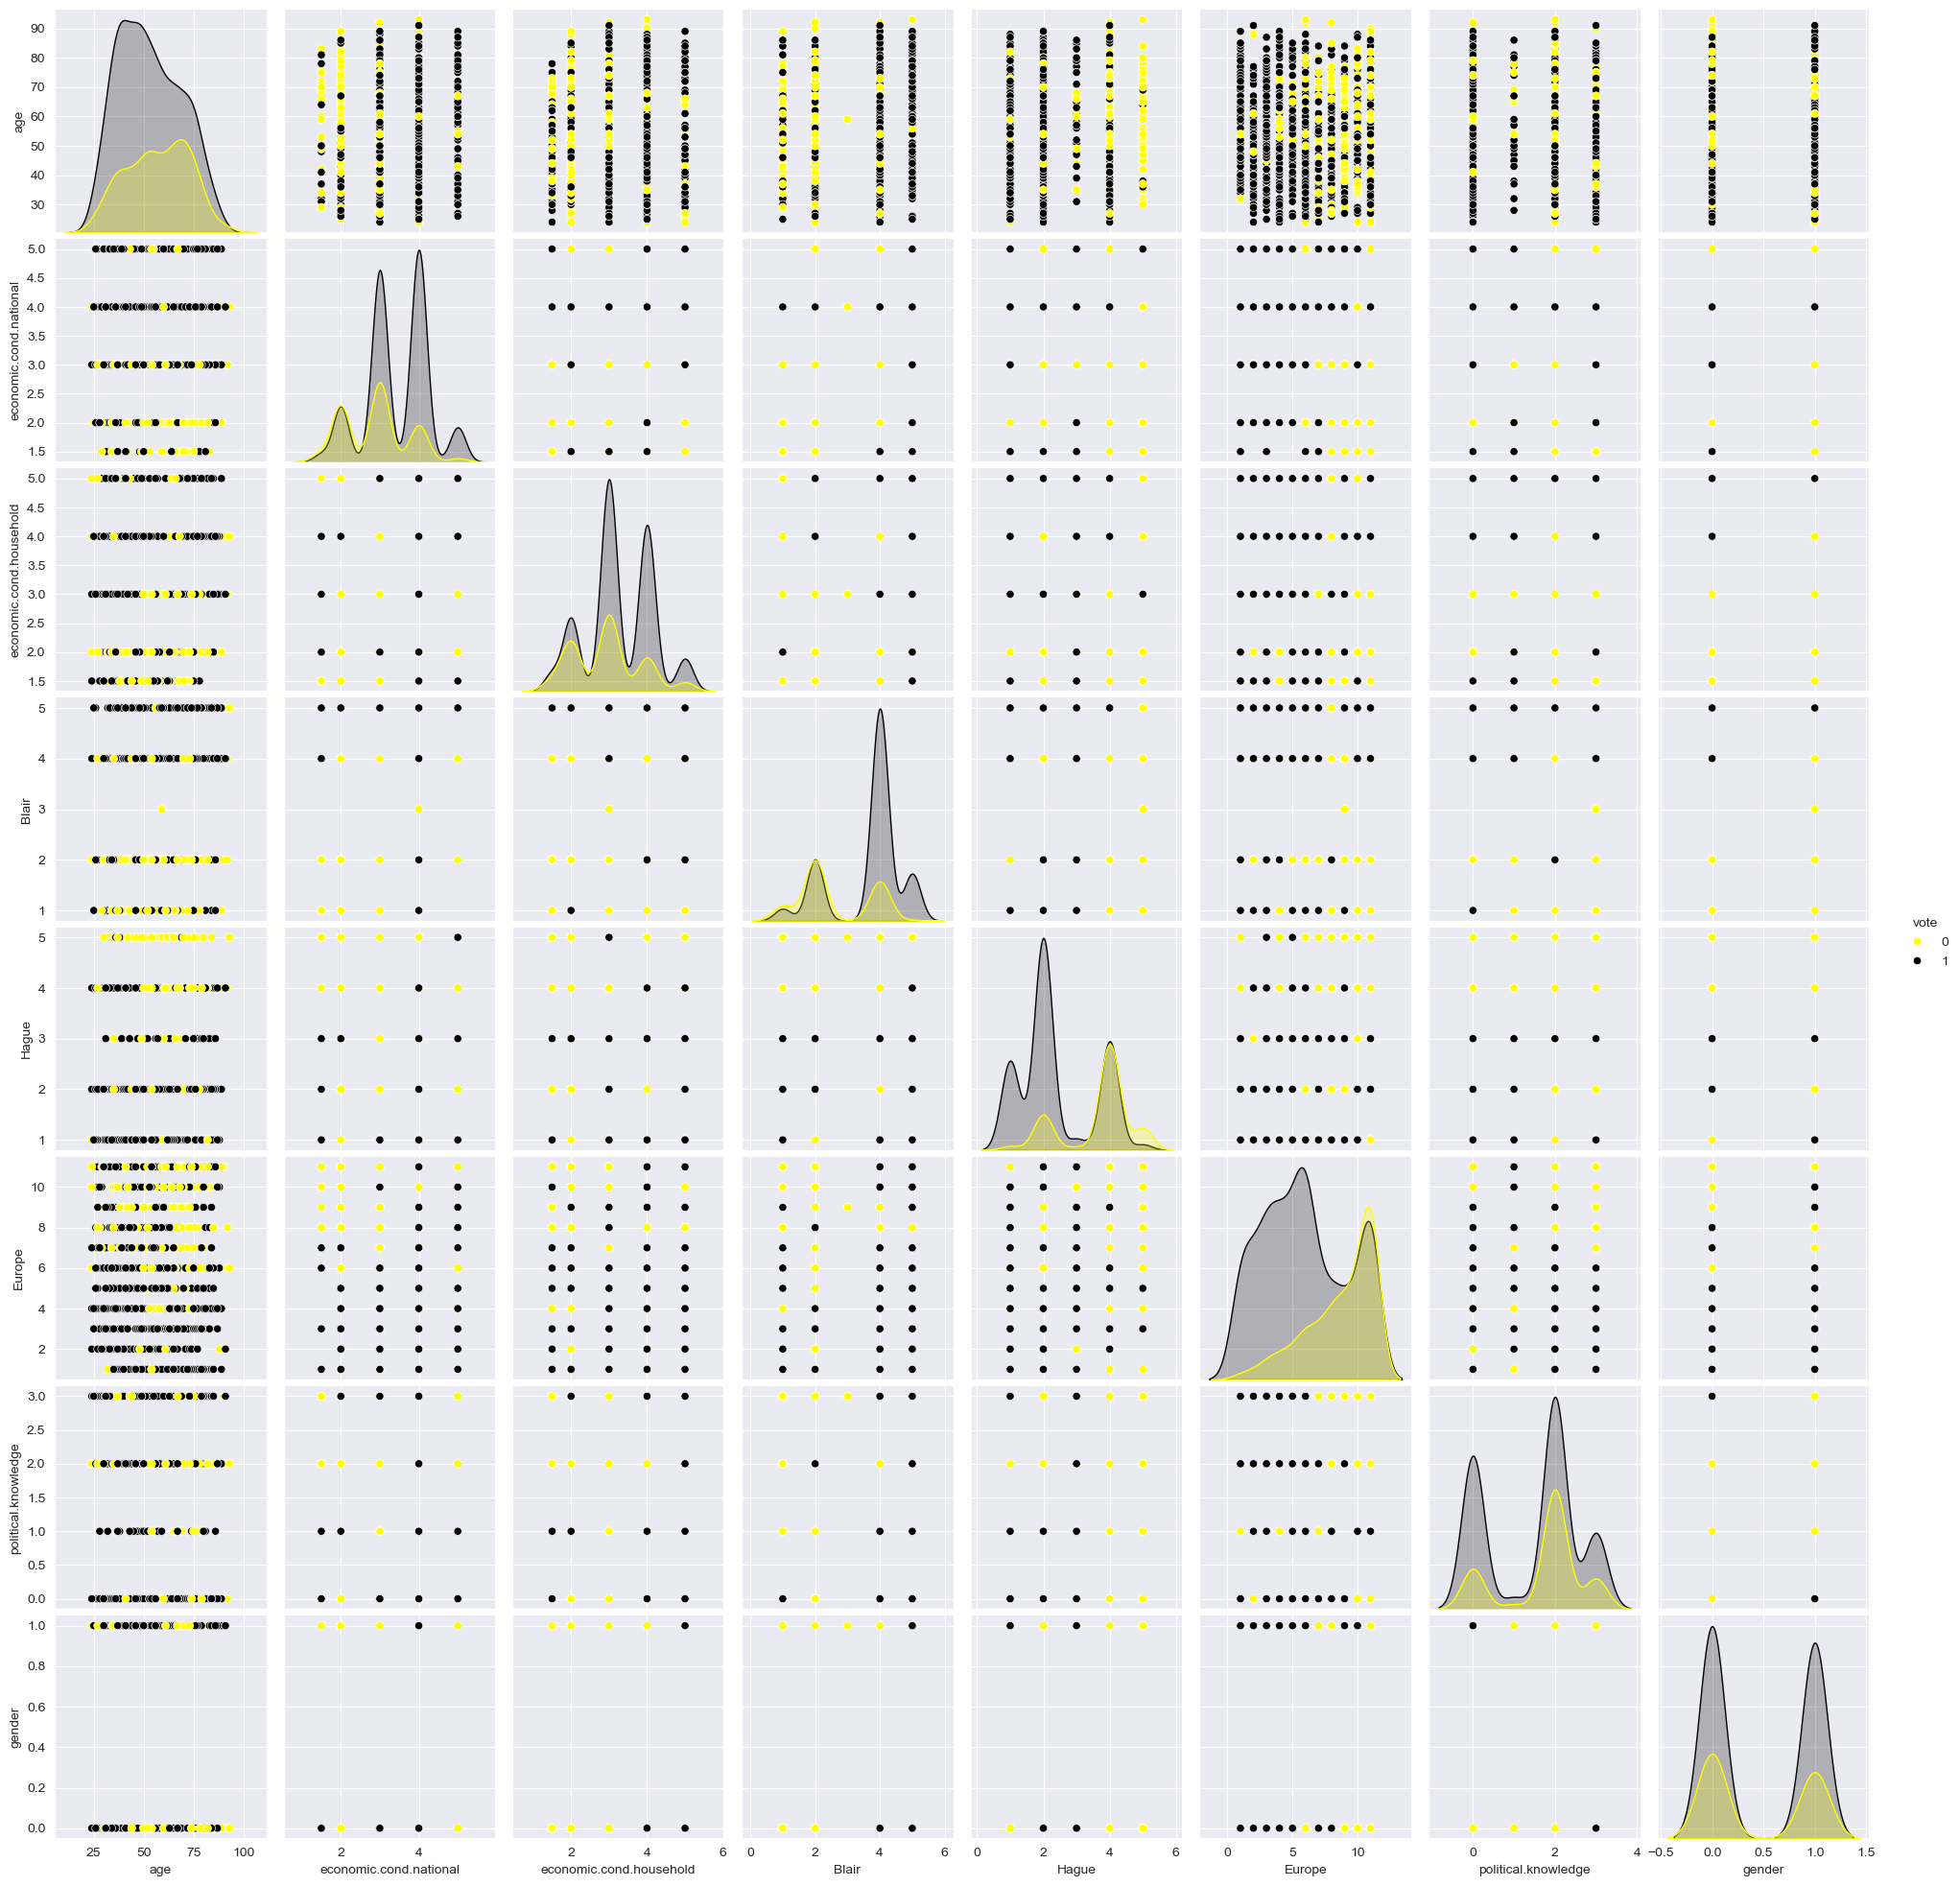

In [396]:
# Set the Matplotlib style to 'dark_background'
# plt.style.use('dark_background')

# Set the theme and style
# sns.set_style(style="darkgrid")
# sns.set_palette("magma")

sns.pairplot(election[['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge', 'vote', 'gender']],
             hue='vote',
             palette=['yellow','black']) 

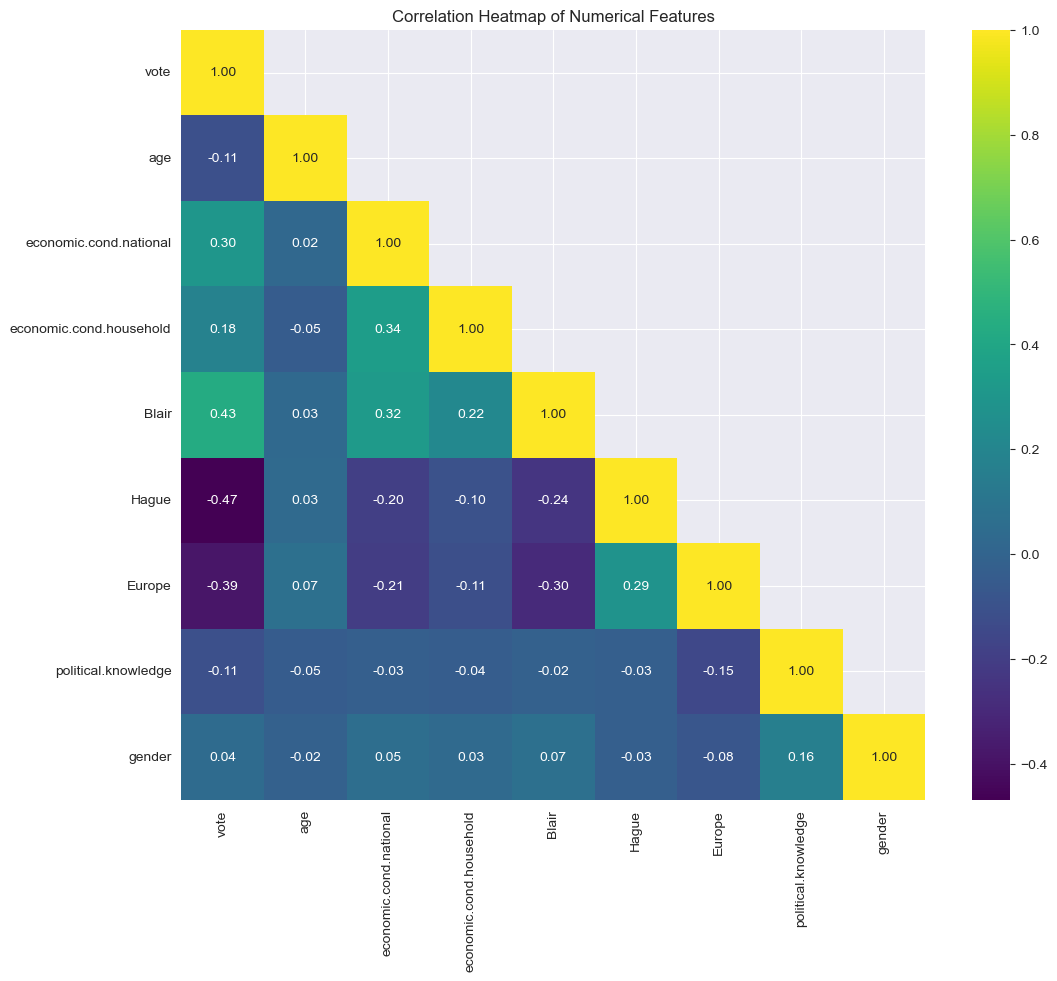

In [397]:
correlation_matrix = election.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", mask=np.triu(election.corr(),+1)); #triu means trim the upper part)

plt.title('Correlation Heatmap of Numerical Features')
plt.show()

<Axes: >

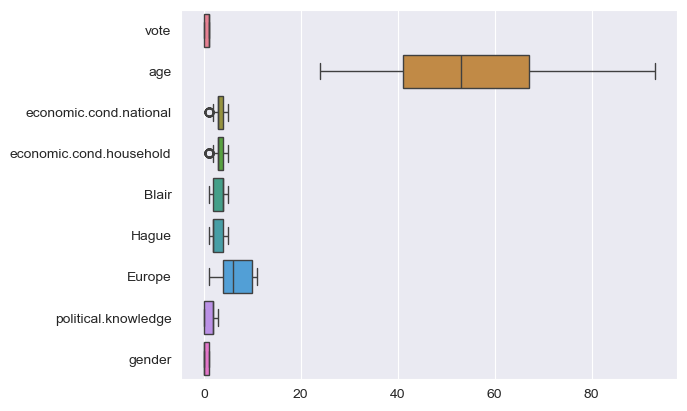

In [97]:
sns.boxplot(election, orient='h')

<Axes: xlabel='vote', ylabel='count'>

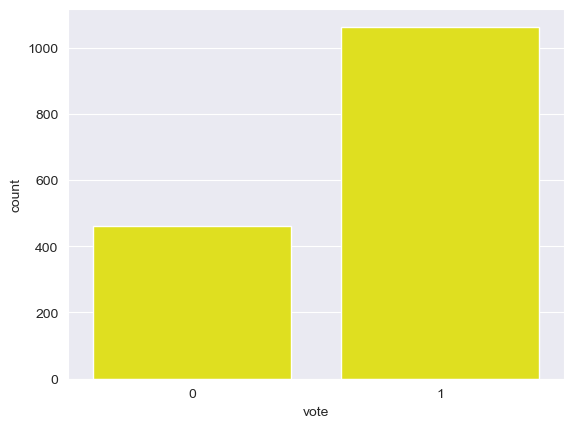

In [176]:
sns.countplot(x='vote', data=election, color="yellow")

<Axes: xlabel='gender', ylabel='count'>

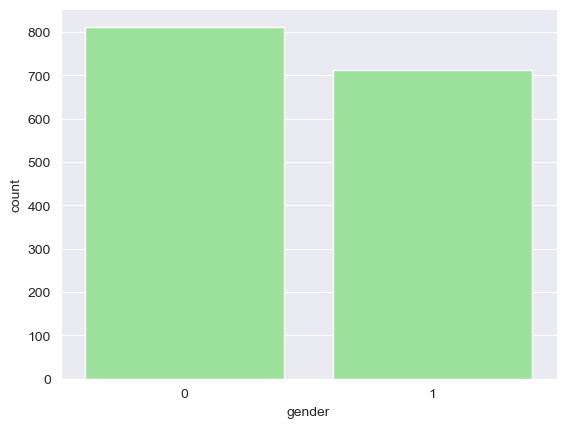

In [156]:
sns.countplot(x='gender', data=election, color="lightgreen")

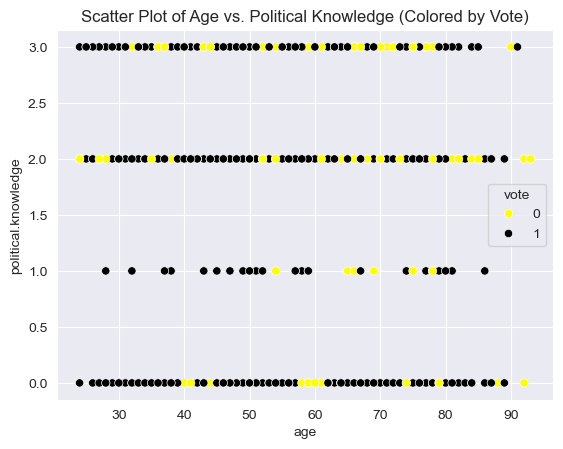

In [160]:
sns.scatterplot(data=election, x='age', y='political.knowledge', hue='vote', palette=['yellow','black'])  # 'hue' adds color for different vote categories
plt.title('Scatter Plot of Age vs. Political Knowledge (Colored by Vote)')
plt.show()

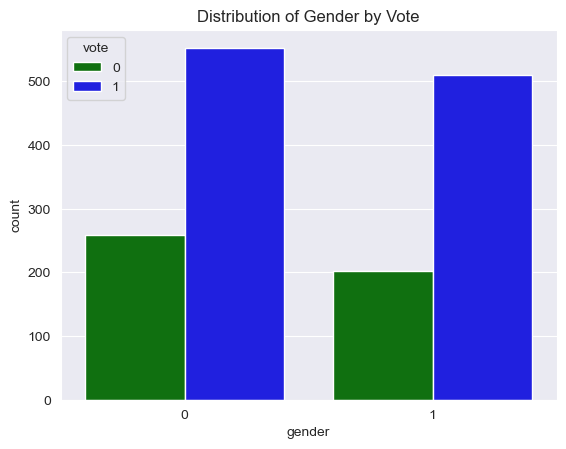

In [172]:
sns.countplot(data=election, x='gender', hue='vote', palette=['green', 'blue'])
plt.title('Distribution of Gender by Vote')
plt.show()

#### Outlier Removal / Treatment

In [186]:
def remove_outlier(col):
    """
    Calculates the lower and upper ranges for outlier detection using the IQR method.

    Args:
        col (pd.Series): The column to check for outliers.

    Returns:
        tuple: A tuple containing the lower and upper ranges for outlier detection.
    """
    sorted(col)
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range


numerical_features = ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']

for column in election[numerical_features].columns:
    lr, ur = remove_outlier(election[column])
    election[column] = np.where(election[column] > ur, ur, election[column])
    election[column] = np.where(election[column] < lr, lr, election[column])


In [188]:
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0
1,1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1
2,1,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1
3,1,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0
4,1,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1


## Splitting in Test - Train Data

In [218]:
# Split the data into training and testing sets
X = election.drop('vote', axis=1)
y = election['vote']

# Split X and Y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [220]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1


In [222]:
y.value_counts()

vote
1    1063
0     462
Name: count, dtype: int64

In [224]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shapes of the training and testing sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1143, 8)
X_test shape: (382, 8)
y_train shape: (1143,)
y_test shape: (382,)


## Model Building & Evaluation
---

#### Model Evaluation

In [422]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import matplotlib.style
plt.style.use('classic')

In [424]:
# for Train data

def evaluate_train_model(model):
    y_train_predict = model.predict(X_train)

    Acc_train = print(model.score(X_train, y_train))

    # Add gray background
    plt.gca().set_facecolor('grey')

    CM_train = print(sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g'
                ,cmap='Blues'));
    plt.xlabel('Predicted')
    plt.ylabel('Actuals', rotation=0)
    plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

    CR_train = print(metrics.classification_report(y_train, y_train_predict))

    probs = model.predict_proba(X_train)
    probs = probs[:, 1]
    auc_train = roc_auc_score(y_train, probs)
    
    return Acc_train, CM_train, CR_train, auc_train
    

In [435]:
# for Test Data

def evaluate_test_model(model):
    y_test_predict = model.predict(X_test)

    Acc_test = print("The accuracuy of the model is {}".format(model.score(X_test,y_test)))

    CM_test = print(sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g'
                ,cmap='Blues'));
    plt.xlabel('Predicted');
    plt.ylabel('Actuals',rotation=0);
    plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

    CR_test = print(metrics.classification_report(y_test,y_test_predict))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    auc_test = roc_auc_score(y_test, probs)
    
    return Acc_test,CM_test,CR_test,auc_test

#### Logistic Regression

In [438]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [440]:
y_train_predict = model.predict(X_train)

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       351
           1       0.87      0.91      0.89       792

    accuracy                           0.85      1143
   macro avg       0.82      0.81      0.81      1143
weighted avg       0.84      0.85      0.84      1143



0.8460192475940508
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       351
           1       0.87      0.91      0.89       792

    accuracy                           0.85      1143
   macro avg       0.82      0.81      0.81      1143
weighted avg       0.84      0.85      0.84      1143



(None, None, None, 0.8953944717833606)

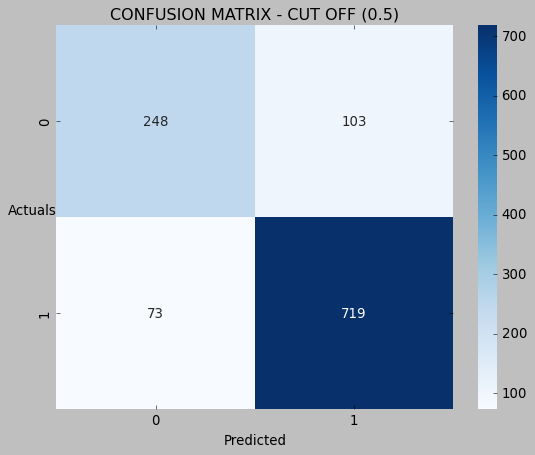

In [442]:
evaluate_train_model(model)

The accuracuy of the model is 0.8115183246073299
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.71      0.59      0.64       111
           1       0.84      0.90      0.87       271

    accuracy                           0.81       382
   macro avg       0.78      0.74      0.76       382
weighted avg       0.80      0.81      0.81       382



(None, None, None, 0.8661946078920248)

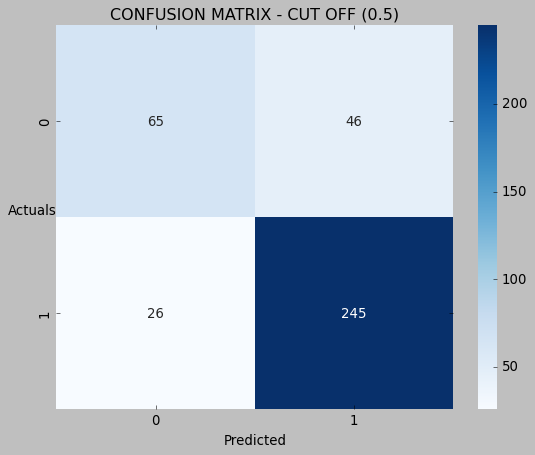

In [444]:
evaluate_test_model(model)

#### Decision Tree

In [450]:
# Decision Tree
dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

0.9991251093613298
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1143
   macro avg       1.00      1.00      1.00      1143
weighted avg       1.00      1.00      1.00      1143



(None, None, None, 0.9999982013870903)

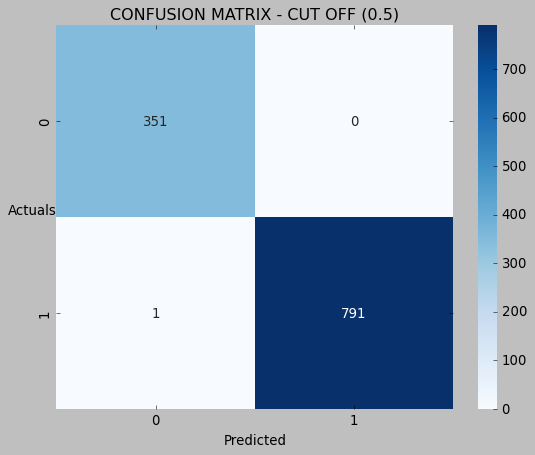

In [452]:
evaluate_train_model(dt_model)

The accuracuy of the model is 0.7905759162303665
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.65      0.59      0.62       111
           1       0.84      0.87      0.86       271

    accuracy                           0.79       382
   macro avg       0.75      0.73      0.74       382
weighted avg       0.79      0.79      0.79       382



(None, None, None, 0.7327216515408397)

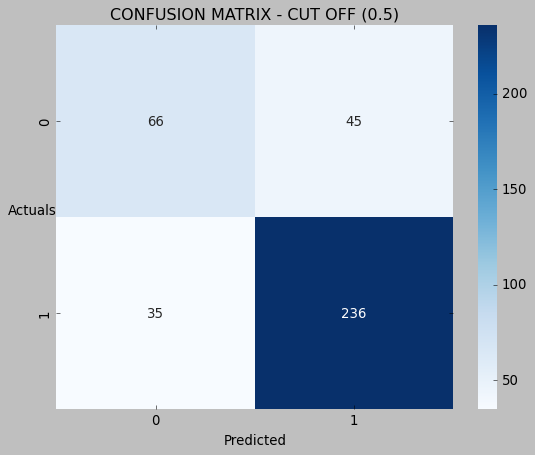

In [454]:
evaluate_test_model(dt_model)

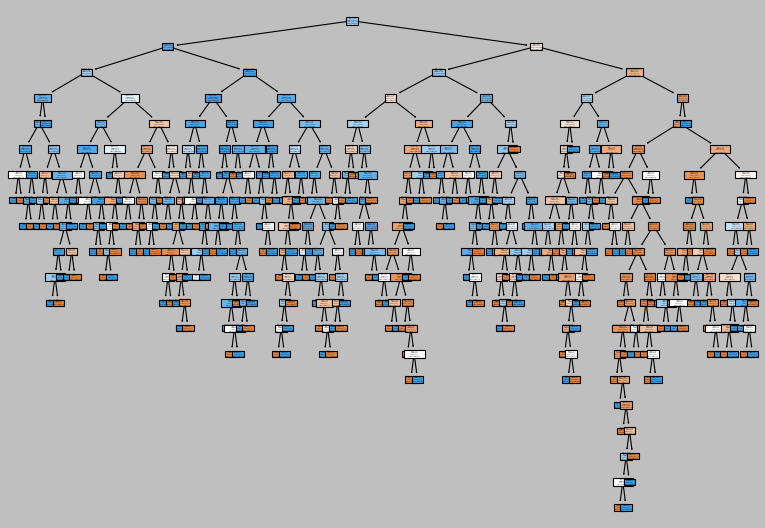

In [456]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming you have a trained DecisionTreeClassifier model named 'dt_model' and 
# your feature data is in a Pandas DataFrame named 'X'

plt.figure(figsize=(12, 8))

plot_tree(dt_model, 
          feature_names=X.columns,  # Replace X with your feature DataFrame
          class_names=["Default_Yes", "Default_No"], # Replace with your class names if needed
          filled=True)

plt.show()

In [458]:
dt_model.feature_importances_

array([0.20970563, 0.06161733, 0.07931296, 0.10025633, 0.2326753 ,
       0.17718934, 0.10034468, 0.03889842])

In [460]:
len(dt_model.feature_importances_)

8

In [462]:
pd.DataFrame(dt_model.feature_importances_*100
             ,index = X.columns, columns=['Imp']).sort_values(by='Imp', ascending=False)

,Imp
Hague,23.267530
age,20.970563
Europe,17.718934
political.knowledge,10.034468
Blair,10.025633
economic.cond.household,7.931296
economic.cond.national,6.161733
gender,3.889842


#### DT Pruning

In [465]:
dt_model_pru = DecisionTreeClassifier(criterion= 'gini', 
                                      max_depth= 7, 
                                      min_samples_leaf=30, 
                                      min_samples_split=20,
                                      max_leaf_nodes=7
                                     )

In [467]:
dt_model_pru.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=7, min_samples_leaf=30,
                       min_samples_split=20)

0.8250218722659668
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.78      0.60      0.68       351
           1       0.84      0.92      0.88       792

    accuracy                           0.83      1143
   macro avg       0.81      0.76      0.78      1143
weighted avg       0.82      0.83      0.82      1143



(None, None, None, 0.8616488963711186)

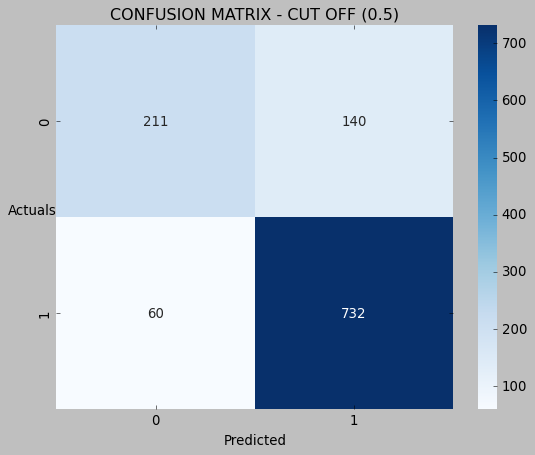

In [469]:
evaluate_train_model(dt_model_pru)

The accuracuy of the model is 0.8036649214659686
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.71      0.55      0.62       111
           1       0.83      0.91      0.87       271

    accuracy                           0.80       382
   macro avg       0.77      0.73      0.74       382
weighted avg       0.80      0.80      0.80       382



(None, None, None, 0.8490741664173399)

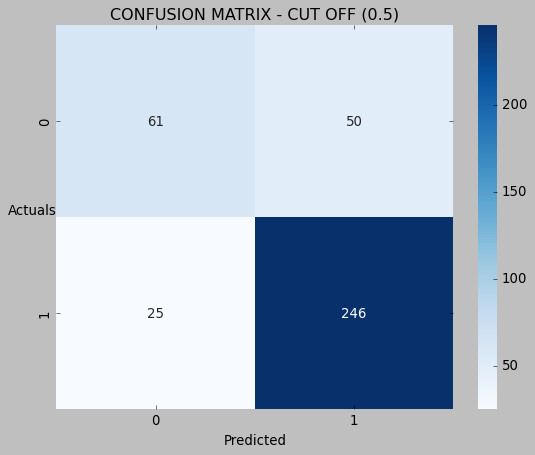

In [471]:
evaluate_test_model(dt_model_pru)

## Running Grid Search
---

In [478]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Measure of split quality
    'max_depth': [3, 5, 10, None],             # Tree depth
    'min_samples_split': [2, 5, 10],          # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum samples in a leaf node
    'max_features': [None, 'sqrt', 'log2']   # Features to consider for splits 
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    estimator= DecisionTreeClassifier(),  # The model to search over
    param_grid=param_grid,              # The parameter grid
    scoring='recall',                   # The evaluation metric to optimise(you can change this)
    cv=5,                              # Number of cross-validation folds
    verbose=1,                           # Verbosity level (optional)
    n_jobs=-1                           # Use all available cores (optional)
)

# Perform the grid search
grid_search.fit(X_train, y_train)  # Replace X_train, y_train with your data

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best recall:", grid_search.best_score_)

# Best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best recall: 0.920452193296712


0.8241469816272966
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.83      0.54      0.65       351
           1       0.82      0.95      0.88       792

    accuracy                           0.82      1143
   macro avg       0.83      0.74      0.77      1143
weighted avg       0.82      0.82      0.81      1143



(None, None, None, 0.8433300238855794)

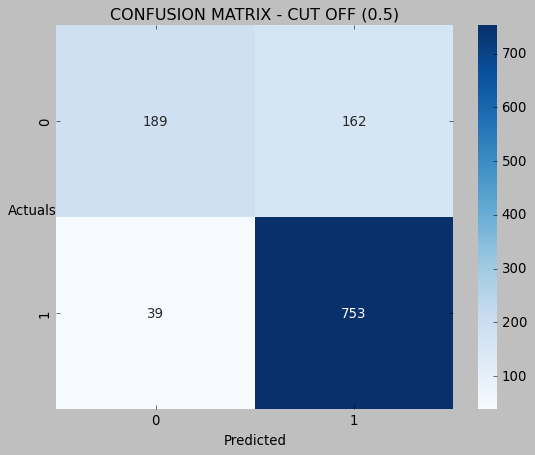

In [480]:
evaluate_train_model(best_model)

The accuracuy of the model is 0.7827225130890052
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.70      0.44      0.54       111
           1       0.80      0.92      0.86       271

    accuracy                           0.78       382
   macro avg       0.75      0.68      0.70       382
weighted avg       0.77      0.78      0.77       382



(None, None, None, 0.7613277484126193)

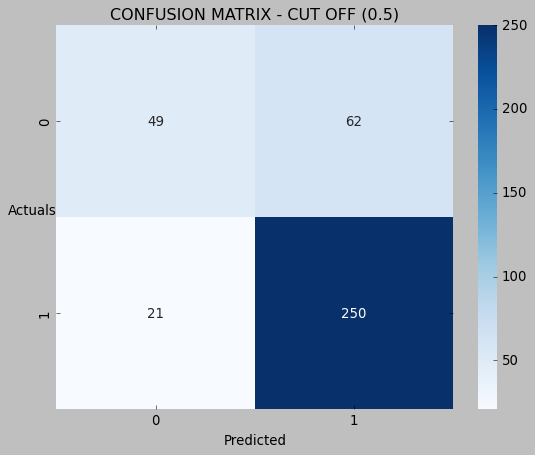

In [482]:
evaluate_test_model(best_model)

## Ensembling
---

### Bagging

In [496]:
bgcl = BaggingClassifier(estimator= dt_model, n_estimators= 5)

In [498]:
bgcl.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

0.9641294838145232
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       351
           1       0.97      0.98      0.97       792

    accuracy                           0.96      1143
   macro avg       0.96      0.95      0.96      1143
weighted avg       0.96      0.96      0.96      1143



(None, None, None, 0.9933307433307433)

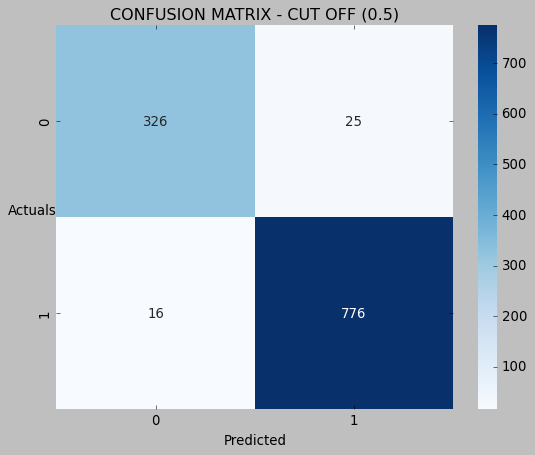

In [500]:
evaluate_train_model(bgcl)

The accuracuy of the model is 0.7984293193717278
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       111
           1       0.85      0.86      0.86       271

    accuracy                           0.80       382
   macro avg       0.76      0.75      0.75       382
weighted avg       0.80      0.80      0.80       382



(None, None, None, 0.8416774708287624)

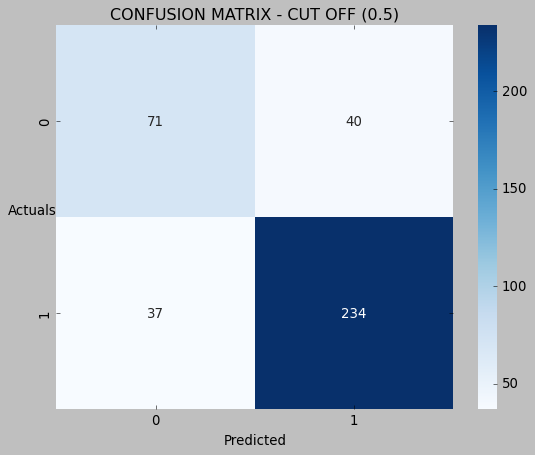

In [502]:
evaluate_test_model(bgcl)

In [506]:
### doing some changes in the code for bagging classifier >>>

# Define the parameter grid
param_grid = {
    'n_estimators': range(10, 101)
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    estimator= bgcl,  # The model to search over
    param_grid=param_grid,              # The parameter grid
    scoring='recall',                   # The evaluation metric to optimise(you can change this)
    cv=5,                              # Number of cross-validation folds
    verbose=1,                           # Verbosity level (optional), displays progress
    n_jobs=-1                           # Use all available cores (optional)
)

# Perform the grid search
grid_search.fit(X_train, y_train)  # Replace X_train, y_train with your data

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best recall:", grid_search.best_score_)

# Best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 91 candidates, totalling 455 fits
Best parameters: {'n_estimators': 67}
Best recall: 0.888934002069899


In [508]:
best_model

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=67)

0.9991251093613298
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1143
   macro avg       1.00      1.00      1.00      1143
weighted avg       1.00      1.00      1.00      1143



(None, None, None, 0.9999982013870902)

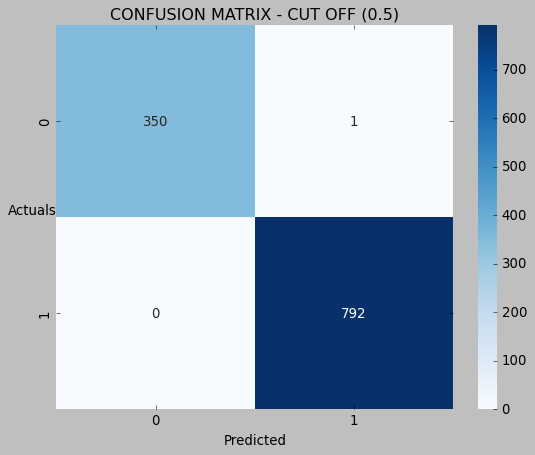

In [510]:
evaluate_train_model(best_model)

The accuracuy of the model is 0.8298429319371727
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       111
           1       0.86      0.90      0.88       271

    accuracy                           0.83       382
   macro avg       0.80      0.78      0.79       382
weighted avg       0.83      0.83      0.83       382



(None, None, None, 0.859013995545361)

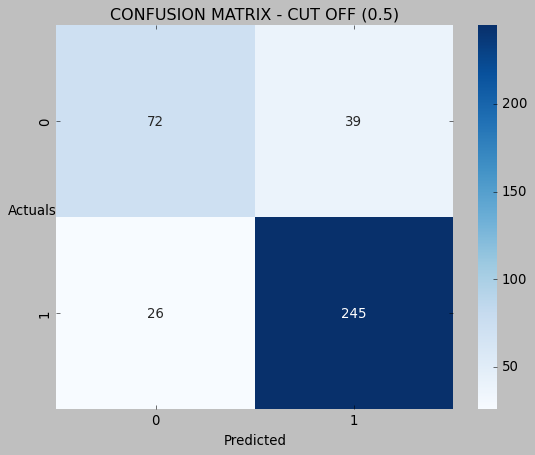

In [512]:
evaluate_test_model(best_model)

### Boosting

##### Ada Boosting

In [515]:
AD_Boost = AdaBoostClassifier()

In [519]:
AD_Boost.fit(X_train, y_train)

AdaBoostClassifier()

0.8521434820647419
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       351
           1       0.88      0.91      0.89       792

    accuracy                           0.85      1143
   macro avg       0.83      0.82      0.82      1143
weighted avg       0.85      0.85      0.85      1143



(None, None, None, 0.9160947077613745)

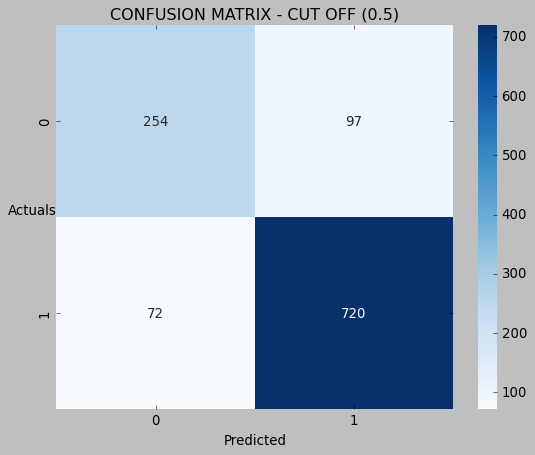

In [521]:
evaluate_train_model(AD_Boost)

The accuracuy of the model is 0.8010471204188482
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       111
           1       0.85      0.88      0.86       271

    accuracy                           0.80       382
   macro avg       0.76      0.75      0.75       382
weighted avg       0.80      0.80      0.80       382



(None, None, None, 0.8654300056514077)

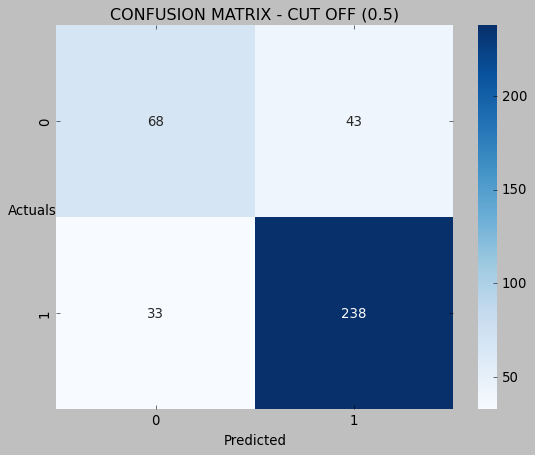

In [523]:
evaluate_test_model(AD_Boost)

##### Gradient Boosting

In [535]:
GB_Boost = GradientBoostingClassifier()

GB_Boost.fit(X_train, y_train)

GradientBoostingClassifier()

0.8941382327209099
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       351
           1       0.91      0.94      0.93       792

    accuracy                           0.89      1143
   macro avg       0.88      0.86      0.87      1143
weighted avg       0.89      0.89      0.89      1143



(None, None, None, 0.9520939451495007)

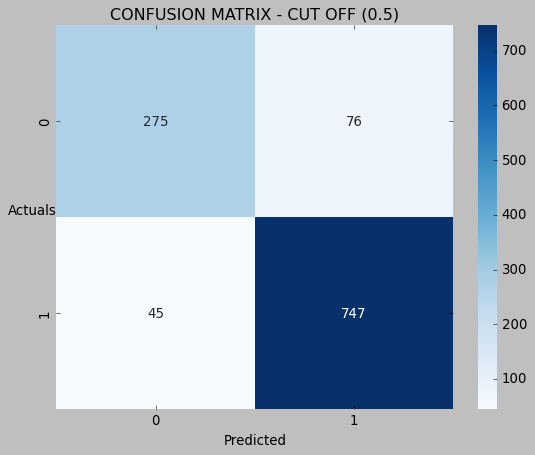

In [537]:
evaluate_train_model(GB_Boost)

The accuracuy of the model is 0.8010471204188482
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       111
           1       0.85      0.88      0.86       271

    accuracy                           0.80       382
   macro avg       0.76      0.75      0.75       382
weighted avg       0.80      0.80      0.80       382



(None, None, None, 0.883381536518068)

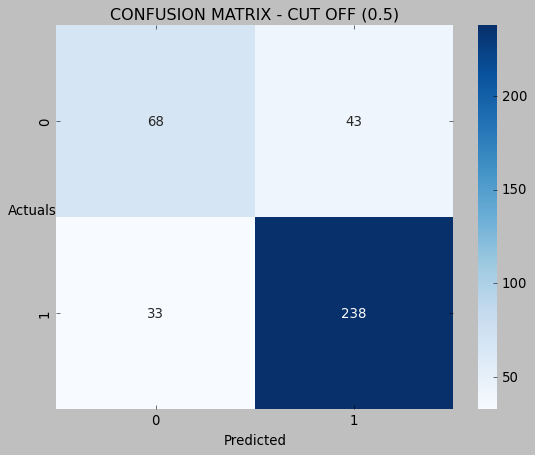

In [539]:
evaluate_test_model(GB_Boost)

##### XG Boost (Extreme Gradient Boosting)

In [544]:
!pip install xgboost

In [546]:
import xgboost as xgb
from xgboost import XGBClassifier

In [548]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1143 entries, 1478 to 1126
Series name: vote
Non-Null Count  Dtype
--------------  -----
1143 non-null   int64
dtypes: int64(1)
memory usage: 17.9 KB


In [554]:
XG_Boost = xgb.XGBClassifier()
XG_Boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

0.9912510936132983
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       351
           1       0.99      0.99      0.99       792

    accuracy                           0.99      1143
   macro avg       0.99      0.99      0.99      1143
weighted avg       0.99      0.99      0.99      1143



(None, None, None, 0.9995881176436732)

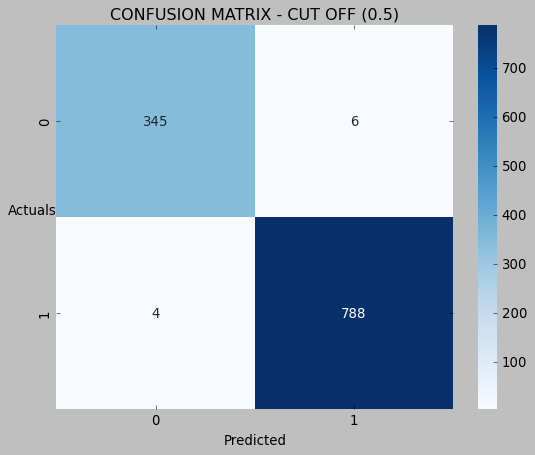

In [556]:
evaluate_train_model(XG_Boost)

The accuracuy of the model is 0.806282722513089
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       111
           1       0.86      0.87      0.86       271

    accuracy                           0.81       382
   macro avg       0.77      0.76      0.76       382
weighted avg       0.80      0.81      0.80       382



(None, None, None, 0.8550912536152389)

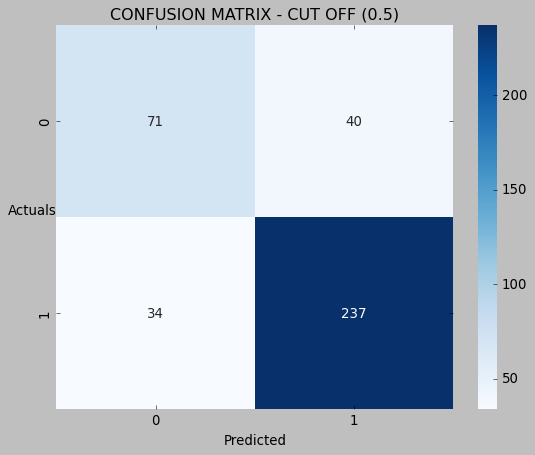

In [558]:
evaluate_test_model(XG_Boost)

## KNN Classification

In [569]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

# Assuming X_train_scaled, y_train, X_test_scaled, y_test are already defined

accuracy_scores = []
recall_scores = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)  # Changed 'k' to 'i' for iteration
    knn.fit(X_train, y_train)

    # Predictions
    y_pred = knn.predict(X_test)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred, average='macro')  # Use 'macro' for multi-class problems

    # Store results
    accuracy_scores.append(acc)
    recall_scores.append(rec)

    print(f"k={i}: Accuracy={acc:.4f}, Recall={rec:.4f}")

k=1: Accuracy=0.7827, Recall=0.7538
k=2: Accuracy=0.7461, Recall=0.7625
k=3: Accuracy=0.7958, Recall=0.7550
k=4: Accuracy=0.7749, Recall=0.7562
k=5: Accuracy=0.7670, Recall=0.7294
k=6: Accuracy=0.7670, Recall=0.7401
k=7: Accuracy=0.7696, Recall=0.7206
k=8: Accuracy=0.7801, Recall=0.7493
k=9: Accuracy=0.7906, Recall=0.7460
k=10: Accuracy=0.7906, Recall=0.7540
k=11: Accuracy=0.8063, Recall=0.7624
k=12: Accuracy=0.8037, Recall=0.7685
k=13: Accuracy=0.8115, Recall=0.7634
k=14: Accuracy=0.8010, Recall=0.7614
k=15: Accuracy=0.8141, Recall=0.7626
k=16: Accuracy=0.8141, Recall=0.7706
k=17: Accuracy=0.8115, Recall=0.7634
k=18: Accuracy=0.8141, Recall=0.7759
k=19: Accuracy=0.8115, Recall=0.7634
k=20: Accuracy=0.8063, Recall=0.7624


In [571]:
best = n = -1
for i in range(0, len(accuracy_scores)):
    if accuracy_scores[i]+recall_scores[i] > best:
        best = accuracy_scores[i]+recall_scores[i]
        n = i+1; # 0-based
        
print(f"best_performance={best}, k={n}")

best_performance=1.5900578037901507, k=18


k=1: Accuracy=0.7932, Recall=0.7691
k=2: Accuracy=0.7513, Recall=0.7662
k=3: Accuracy=0.7906, Recall=0.7540
k=4: Accuracy=0.7801, Recall=0.7599
k=5: Accuracy=0.7775, Recall=0.7315
k=6: Accuracy=0.7723, Recall=0.7384
k=7: Accuracy=0.7801, Recall=0.7253
k=8: Accuracy=0.7749, Recall=0.7403
k=9: Accuracy=0.7984, Recall=0.7462
k=10: Accuracy=0.8063, Recall=0.7730
k=11: Accuracy=0.7958, Recall=0.7444
k=12: Accuracy=0.7958, Recall=0.7577
k=13: Accuracy=0.8089, Recall=0.7616
k=14: Accuracy=0.8063, Recall=0.7651
k=15: Accuracy=0.8010, Recall=0.7428
k=16: Accuracy=0.8063, Recall=0.7624
k=17: Accuracy=0.8010, Recall=0.7428
k=18: Accuracy=0.8063, Recall=0.7597
k=19: Accuracy=0.7984, Recall=0.7409
k=20: Accuracy=0.7932, Recall=0.7452


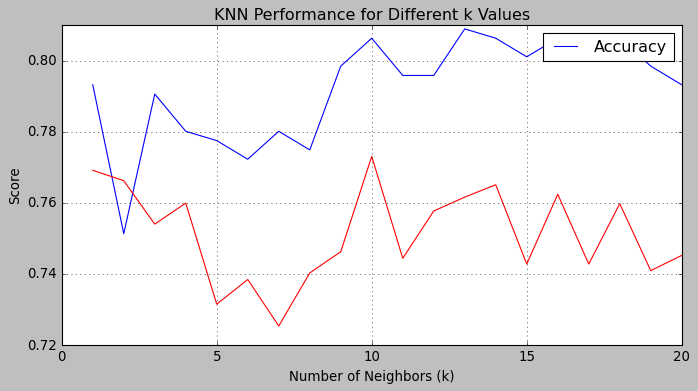

In [575]:
# USing MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

# Normalize the features using Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of k values to test
k_values = range(1, 21)
accuracy_scores = []
recall_scores = []

# Train multiple KNN models for different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = knn.predict(X_test_scaled)
    
    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred, average='macro')  # Use 'macro' for multi-class problems
    
    # Store results
    accuracy_scores.append(acc)
    recall_scores.append(rec)

    print(f"k={k}: Accuracy={acc:.4f}, Recall={rec:.4f}")

# Plot Accuracy and Recall vs. k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, label="Accuracy")
plt.plot(k_values, recall_scores, color='red')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Score")
plt.title("KNN Performance for Different k Values")
plt.legend()
plt.grid()
plt.show()

In [366]:
# K-Nearest Neighbors
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.64      0.61       111
           1       0.85      0.82      0.83       271

    accuracy                           0.77       382
   macro avg       0.72      0.73      0.72       382
weighted avg       0.77      0.77      0.77       382



In [ ]:
# Support Vector Machine
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



# Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Gradient Boosting
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# AdaBoost
model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))